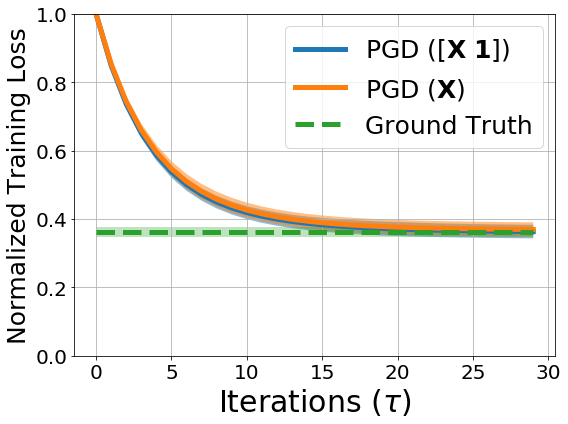

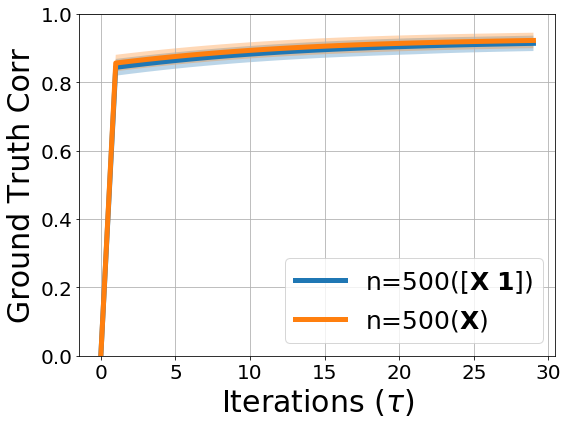

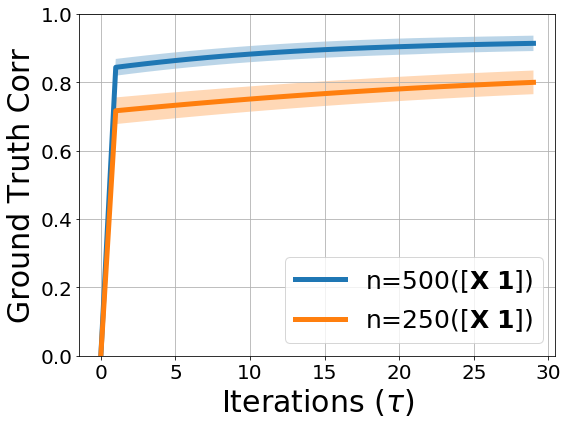

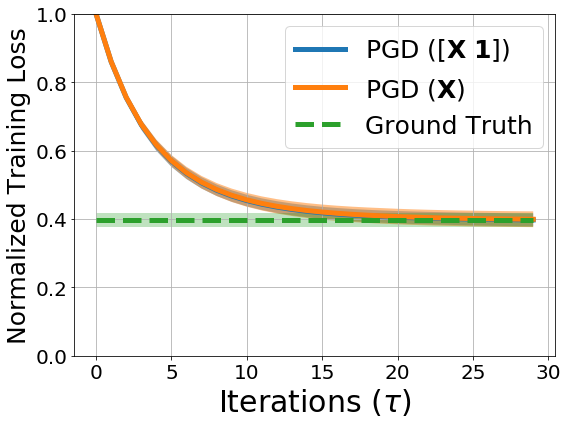

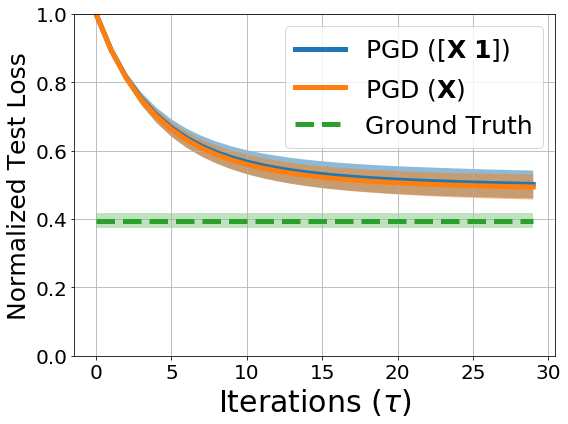

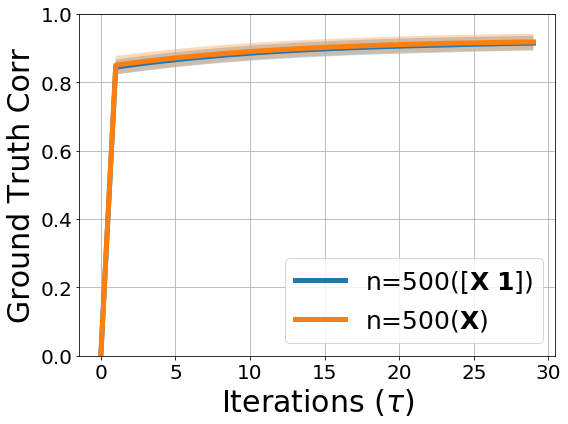

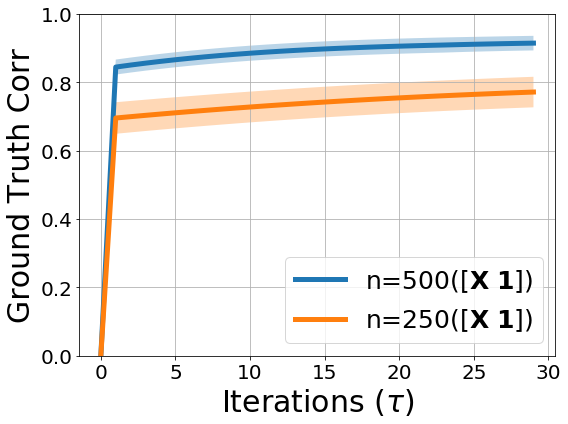

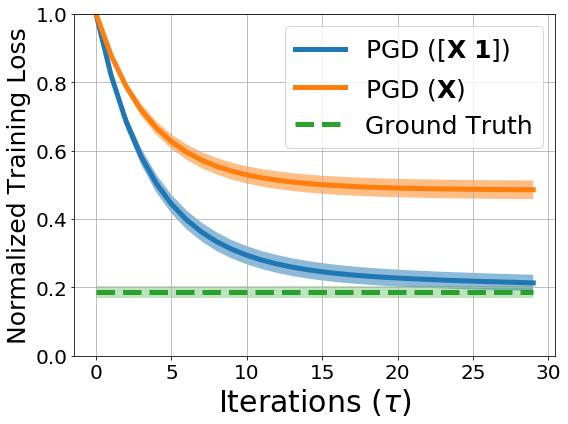

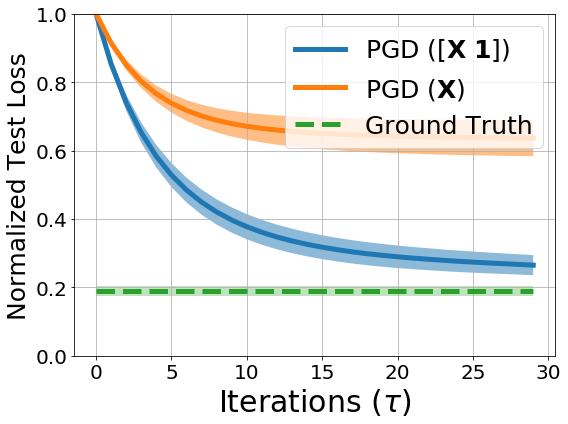

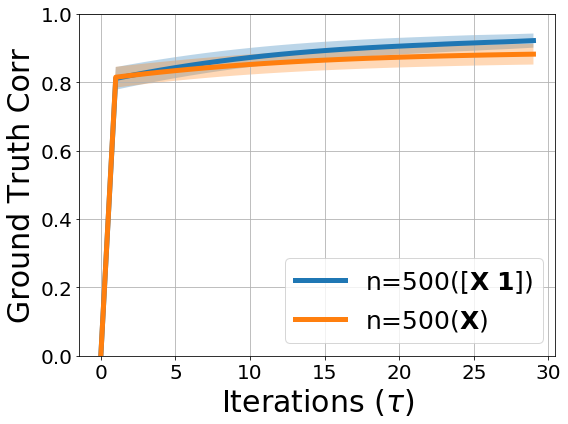

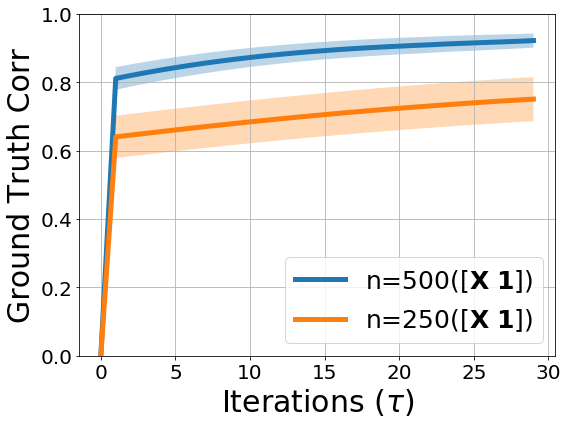

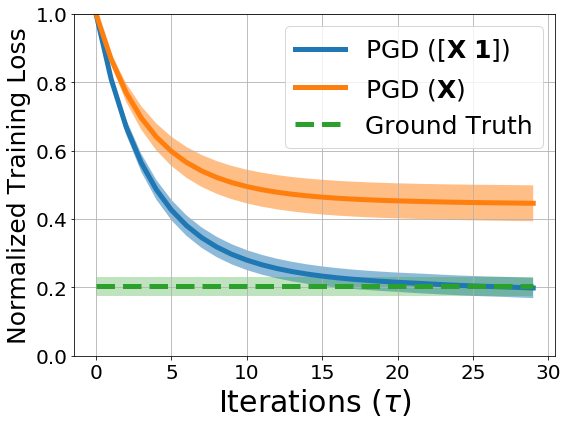

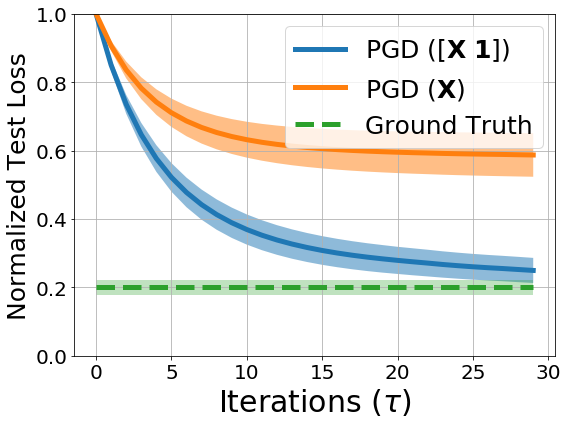

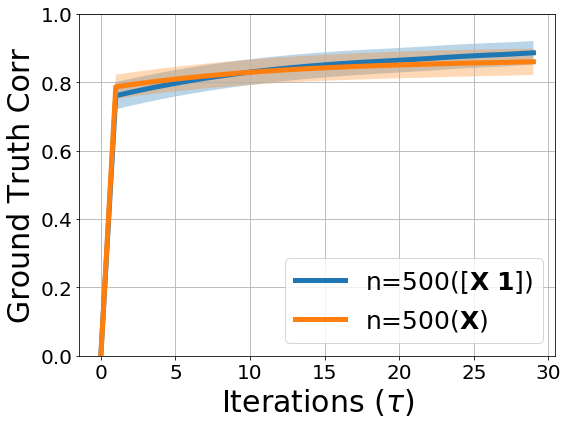

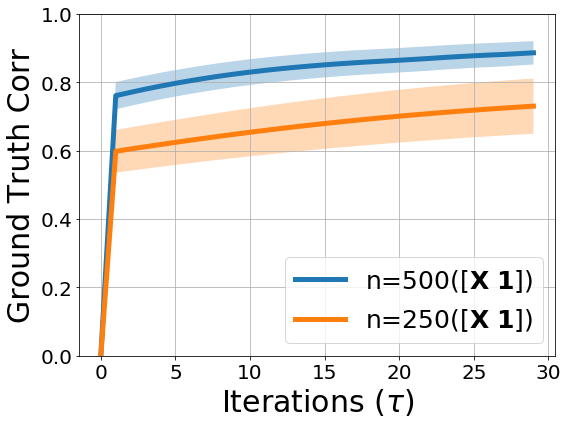

In [16]:
import numpy as np
import numpy.linalg as nl
import matplotlib.pyplot as plt

def hard_thresh(beta,s):
    beta[np.argsort(-np.abs(beta))[s:]]=0
    return beta

def corr(beta,theta):
    if nl.norm(theta)==0 or nl.norm(beta)==0:
        return 0
    return beta.dot(theta)/nl.norm(theta)/nl.norm(beta)
def act(beta,opt):
    if opt==0:
        return np.sign(beta)
    if opt==1:
        return np.maximum(beta,0)
    
def oneiter_wout1():
    beta=np.random.randn(p)
    beta[np.argsort(np.random.randn(p))[:-s]]=0
    X0=np.random.exponential(1,[n,p])-1 if dst==1 else np.random.randn(n,p)
    XT0=np.random.exponential(1,[n,p])-1 if dst==1 else np.random.randn(n,p)
    X=X0#/np.sqrt(n)
    y=act(X.dot(beta),typ)
    XT=XT0#/np.sqrt(n)
    yt=act(XT.dot(beta),typ)
    theta=np.zeros((p))
    corrs=np.zeros((itnum))
    fits=np.zeros((itnum))
    tests=np.zeros((itnum))
    base=np.zeros((itnum))
    baset=np.zeros((itnum))
    for i in range(itnum):
        corrs[i]=corr(beta,theta)
        fits[i]=nl.norm(y-X.dot(theta))**2/nl.norm(y)**2
        tests[i]=nl.norm(yt-XT.dot(theta))**2/nl.norm(yt)**2
        theta+=mu*X.T.dot(y-X.dot(theta))
        theta=hard_thresh(theta,s)
        base[i]=nl.norm(y-X.dot(beta)*(y.dot(X.dot(beta))/nl.norm(X.dot(beta))**2))**2/nl.norm(y)**2
        baset[i]=nl.norm(yt-XT.dot(beta)*(yt.dot(XT.dot(beta))/nl.norm(XT.dot(beta))**2))**2/nl.norm(yt)**2
    return corrs,fits,tests,base,baset

def oneiter_wt1():
    beta=np.random.randn(p)
    beta[np.argsort(np.random.randn(p))[:-s]]=0
    X0=np.random.exponential(1,[n,p])-1 if dst==1 else np.random.randn(n,p)
    XT0=np.random.exponential(1,[n,p])-1 if dst==1 else np.random.randn(n,p)
    X=X0#/np.sqrt(n)
    co=np.ones((n,1))#/np.sqrt(n)
    X_til=np.concatenate((X,co),axis=1)
    y=act(X.dot(beta),typ)
    XT=XT0#/np.sqrt(n)
    XT_til=np.concatenate((XT,co),axis=1)
    yt=act(XT.dot(beta),typ)
    theta=np.zeros((p+1))
    corrs=np.zeros((itnum))
    fits=np.zeros((itnum))
    tests=np.zeros((itnum))
    base=np.zeros((itnum))
    baset=np.zeros((itnum))
    for i in range(itnum):
        corrs[i]=corr(beta,theta[0:p])
        fits[i]=nl.norm(y-X_til.dot(theta))**2/nl.norm(y)**2
        tests[i]=nl.norm(yt-XT_til.dot(theta))**2/nl.norm(yt)**2
        theta+=mu*X_til.T.dot(y-X_til.dot(theta))
        theta_proj=hard_thresh(theta[0:p],s)
        theta[0:p]=theta_proj
        #yp=y-np.mean(y)
        #ytp=yt-np.mean(yt)
        #base[i]=nl.norm(yp-X.dot(beta)*(yp.dot(X.dot(beta))/nl.norm(X.dot(beta))**2))**2/nl.norm(yp)**2
        #baset[i]=nl.norm(ytp-XT.dot(beta)*(ytp.dot(XT.dot(beta))/nl.norm(XT.dot(beta))**2))**2/nl.norm(ytp)**2
    GT_m=np.zeros((p+1))
    GT_m[0:p]=beta
    gamma_p=y.T.dot(X.dot(beta))/nl.norm(X.dot(beta))**2
    GT_m[p]=theta[p]/gamma_p
    for k in range(1000):
        gamma=y.T.dot(X_til.dot(GT_m))/nl.norm(X_til.dot(GT_m))**2
        GT_m[p]=theta[p]/gamma
    
    gammaT=yt.T.dot(XT_til.dot(GT_m))/nl.norm(XT_til.dot(GT_m))**2
    base=nl.norm(y-X_til.dot(GT_m)*gamma)**2/nl.norm(y)**2*np.ones((itnum))
    baset=nl.norm(yt-XT_til.dot(GT_m)*gammaT)**2/nl.norm(yt)**2*np.ones((itnum))
    return corrs,fits,tests,base,baset

trial=20
itnum=30
mu=0.0002
for typ in range(2):
    for dst in range(2):
        n0=500
        n=n0
        p=800
        s=20

        corrs=np.zeros((2,trial,itnum))
        fits=np.zeros((2,trial,itnum))
        base=np.zeros((2,trial,itnum))
        tests=np.zeros((2,trial,itnum))
        baset=np.zeros((2,trial,itnum))
        for i in range(trial):
            c,f,t,b,bt=oneiter_wt1()
            corrs[0,i]=c
            fits[0,i]=f
            tests[0,i]=t
            base[0,i]=b
            baset[0,i]=bt
            c,f,t,b,bt=oneiter_wout1()
            corrs[1,i]=c
            fits[1,i]=f
            tests[1,i]=t
            base[1,i]=b
            baset[1,i]=bt

        C2=0.5
        n=int(n0*C2)

        corrs2=np.zeros((2,trial,itnum))
        fits2=np.zeros((2,trial,itnum))
        base2=np.zeros((2,trial,itnum))
        tests2=np.zeros((2,trial,itnum))
        baset2=np.zeros((2,trial,itnum))
        for i in range(trial):
            c,f,t,b,bt=oneiter_wt1()
            corrs2[0,i]=c
            fits2[0,i]=f
            tests2[0,i]=t
            base2[0,i]=b
            baset2[0,i]=bt
            c,f,t,b,bt=oneiter_wout1()
            corrs2[1,i]=c
            fits2[1,i]=f
            tests2[1,i]=t
            base2[1,i]=b
            baset2[1,i]=bt

        strng='s'+str(s)+'_n'+str(n0)+'_p'+str(p)+'_typ'+str(typ)+'_dst'+str(dst)
        plot_all()

In [17]:
def plot_all():
    fig=plt.figure(figsize=(8,6)) 
    plt.plot(range(itnum),np.mean(fits[0,:],0),linewidth=5)
    plt.fill_between(range(itnum),np.mean(fits[0,:],0)-np.std(fits[0,:],0),np.mean(fits[0,:],0)+np.std(fits[0,:],0),alpha=0.5)
    plt.plot(range(itnum),np.mean(fits[1,:],0),linewidth=5)
    plt.fill_between(range(itnum),np.mean(fits[1,:],0)-np.std(fits[1,:],0),np.mean(fits[1,:],0)+np.std(fits[1,:],0),alpha=0.5)
    plt.plot(range(itnum),np.mean(base[0,:],0),'--',linewidth=5)
    plt.fill_between(range(itnum),np.mean(base[0,:],0)-np.std(base[0,:],0),np.mean(base[0,:],0)+np.std(base[0,:],0),alpha=0.3)
    plt.xlabel('Iterations ($\\tau$)',fontsize=30)
    plt.ylabel('Normalized Training Loss',fontsize=25)
    plt.legend(['PGD ([$\\bf{X}$ $\\bf{1}$])','PGD ($\\bf{X}$)','Ground Truth'],fontsize=25)
    plt.grid(True)
    plt.ylim([0,1])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show(True)
    fig_name='error_fits'+strng+'.pdf'
    fig.savefig(fig_name, format='pdf', dpi=1000)

    fig=plt.figure(figsize=(8,6)) 
    plt.plot(range(itnum),np.mean(tests[0,:],0),linewidth=5)
    plt.fill_between(range(itnum),np.mean(tests[0,:],0)-np.std(tests[0,:],0),np.mean(tests[0,:],0)+np.std(tests[0,:],0),alpha=0.5)
    plt.plot(range(itnum),np.mean(tests[1,:],0),linewidth=5)
    plt.fill_between(range(itnum),np.mean(tests[1,:],0)-np.std(tests[1,:],0),np.mean(tests[1,:],0)+np.std(tests[1,:],0),alpha=0.5)
    plt.plot(range(itnum),np.mean(baset[0,:],0),'--',linewidth=5)
    plt.fill_between(range(itnum),np.mean(baset[0,:],0)-np.std(baset[0,:],0),np.mean(baset[0,:],0)+np.std(baset[0,:],0),alpha=0.3)
    plt.xlabel('Iterations ($\\tau$)',fontsize=30)
    plt.ylabel('Normalized Test Loss',fontsize=25)
    plt.legend(['PGD ([$\\bf{X}$ $\\bf{1}$])','PGD ($\\bf{X}$)','Ground Truth'],fontsize=25)
    plt.grid(True)
    plt.ylim([0,1])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show(True)
    fig_name='error_tests'+strng+'.pdf'
    fig.savefig(fig_name, format='pdf', dpi=1000)
    
    fig=plt.figure(figsize=(8,6)) 
    plt.plot(range(itnum),np.mean(corrs[0,:],0),linewidth=5)
    plt.fill_between(range(itnum),np.mean(corrs[0,:],0)-np.std(corrs[0,:],0),np.mean(corrs[0,:],0)+np.std(corrs[0,:],0),alpha=0.3)
    plt.plot(range(itnum),np.mean(corrs[1,:],0),linewidth=5)
    plt.fill_between(range(itnum),np.mean(corrs[1,:],0)-np.std(corrs[1,:],0),np.mean(corrs[1,:],0)+np.std(corrs[1,:],0),alpha=0.3)
    plt.xlabel('Iterations ($\\tau$)',fontsize=30)
    plt.ylabel('Ground Truth Corr',fontsize=30)
    plt.legend(['n='+str(n0)+'([$\\bf{X}$ $\\bf{1}$])','n='+str(n0)+'($\\bf{X}$)'],fontsize=25)
    #plt.title('Correlation',fontsize=30)
    plt.grid(True)
    plt.ylim([0,1])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show(True)
    fig_name='corr_comp'+strng+'.pdf'
    fig.savefig(fig_name, format='pdf', dpi=1000)
    
    fig=plt.figure(figsize=(8,6)) 
    plt.plot(range(itnum),np.mean(corrs[0,:],0),linewidth=5)
    plt.fill_between(range(itnum),np.mean(corrs[0,:],0)-np.std(corrs[0,:],0),np.mean(corrs[0,:],0)+np.std(corrs[0,:],0),alpha=0.3)
    plt.plot(range(itnum),np.mean(corrs2[0,:],0),linewidth=5)
    plt.fill_between(range(itnum),np.mean(corrs2[0,:],0)-np.std(corrs2[0,:],0),np.mean(corrs2[0,:],0)+np.std(corrs2[0,:],0),alpha=0.3)
    plt.xlabel('Iterations ($\\tau$)',fontsize=30)
    plt.ylabel('Ground Truth Corr',fontsize=30)
    plt.legend(['n='+str(n0)+'([$\\bf{X}$ $\\bf{1}$])','n='+str(int(n0*C2))+'([$\\bf{X}$ $\\bf{1}$])'],fontsize=25)
    #plt.title('Correlation',fontsize=30)
    plt.grid(True)
    plt.ylim([0,1])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show(True)
    fig_name='corr'+strng+'.pdf'
    fig.savefig(fig_name, format='pdf', dpi=1000)
